In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import docx
import warnings
from timezonefinder import TimezoneFinder
import pytz
from math import modf
from datetime import datetime
import folium
from skyfield import almanac
from skyfield.api import Topos,load
from skyfield.api import EarthSatellite
from skyfield import api
import json
from skyfield.api import GREGORIAN_START
import time
from skyfield.api import load, Topos
from skyfield.trigonometry import position_angle_of
import math




year = int(input("Enter year: "))
month = int(input("Enter month: "))
day = int(input("Enter day: "))

planets = load('de422.bsp')
earth = planets['earth']
sun = planets['sun']
moon = planets['moon']
ts = load.timescale()
eph = api.load('de422.bsp')
d=1



st = time.time()


warnings.filterwarnings('ignore')



latitude = np.arange(-90, 91, 2)
longitude = np.arange(-180, 181, 2)
latitude_longitude = np.array(np.meshgrid(latitude, longitude)).T.reshape(-1, 2)
df = pd.DataFrame(latitude_longitude, columns=['Latitude', 'Longitude'])
grouped = df.groupby('Longitude')
grouped_dfs = [grouped.get_group(x) for x in grouped.groups]






Enter year: 2021
Enter month: 8
Enter day: 9


In [2]:
start_time = time.time()

def timezone(x):
    try:
        print('Running')
        tf = TimezoneFinder()
        #latitude, longitude = x['Lat'], x['Long']
        time_zone =tf.timezone_at(lng=x['Longitude'], lat=x['Latitude'])

        # it will get the time zone 
        # of the specified location
        TZ_dummy = pytz.timezone(time_zone)

        TZ1 = datetime.now(TZ_dummy)
        TZ2=int(TZ1.strftime(' %z'))/100
        TZ_frac,TZ_int = modf(TZ2)
        TZ = round(TZ_frac*100)/60 + TZ_int
        #print("Date & Time in IST : ", datetime_ist.strftime(' %z'))
        
        return TZ
    except :
        return ''


for df in grouped_dfs:
    df['TZ'] = df.apply(timezone, axis=1)
    
end_time = time.time()

processing_time = end_time - start_time
processing_time_minutes = processing_time / 60

print("Processing time: {:.2f} minutes".format(processing_time_minutes))
    

Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running
Running


In [4]:
for i, df in enumerate(grouped_dfs):
    df.to_csv('grouped_df_{}.csv'.format(i), index=False)

In [ ]:
grouped_dfs = []
for i in range(181):
    df = pd.read_csv('grouped_df_{}.csv'.format(i))
    grouped_dfs.append(df)

In [14]:

for df in grouped_dfs:
    df['Year'] = year
    df['Month'] = month
    df['Day'] = day
    df['Ele'] = 0
    df['O'] = 'E'
    


In [15]:
#Function Libraries


    #Lagtime
def lagtime_moonset(x):
    try:

        ts.julian_calendar_cutoff = GREGORIAN_START
        bluffton = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.risings_and_settings(eph, eph['Moon'], bluffton)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False

        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%d/%m %H:%M')))
                jdmoonset = ti.tdb
                return jdmoonset
                #print("Moonset",str_moonset)
                #jd_moonset = format(ti.tdb)

                #print(jd_moonset)
            else:
                None
    except:
        return ''
    
def lagtime_sunset(x):  
    try:

        ts.julian_calendar_cutoff = GREGORIAN_START
        bluffton = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.risings_and_settings(eph, eph['Sun'], bluffton)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False

        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M')))
                #hsunset = ti.utc_strftime('%H')
                #msunset = ti.utc_strftime('%M')
                #m_sunset = int(hsunset)*60 + int(msunset)
                jdsunset = ti.tdb
                return jdsunset
                #print("Sunset",str_sunset)
                #print("JD Sunset",jd_sunset)
                #print("Sunset",str_sunset)
                #print(x['Day'], x['Month'] ,x['Year'],x['Lat'],x['Long'],str_sunset)
                #return str_sunset

                #d_sunset = format(ti.tdb)

            else:
                None
    except:
        return ''
    
def lagtime(x):
    try:
        a=x['lagtime_moonset']
        b= x['lagtime_sunset']
        c = (a-b)*24*60
        return c
    except:
        return ''
    
    
#Find Moonage

def moonage(x):
    try:
        #Find TIme of Conjuction
        
        ts.julian_calendar_cutoff = GREGORIAN_START
        bluffton = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-1-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+2-x['TZ']/24)    
        f = almanac.oppositions_conjunctions(eph, eph['Moon'])
        t, y = almanac.find_discrete(t0, t1, f)


        for ti, yi in zip(t, y):
            if yi == 1:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%d/%m %H:%M')))
                jd_moon_conj = format(ti.tdb)
                #return jd_moon_conj
            else:
                None

        #Find Sunset
        bluffton = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.risings_and_settings(eph, eph['Sun'], bluffton)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False

        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M')))
                #hsunset = ti.utc_strftime('%H')
                #msunset = ti.utc_strftime('%M')
                #m_sunset = int(hsunset)*60 + int(msunset)
                jd_sun = format(ti.tdb)
            else:
                None
        #Moonage = Conjunction - Sunset
        moonage=(float(jd_sun)-float(jd_moon_conj))*24        
        return moonage
    except:
        return ''


#Find Arc of Vision
def arcv(x):
    try:

        ts.julian_calendar_cutoff = GREGORIAN_START
        location = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.sunrise_sunset(eph,location)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False
        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M:%S')))
                ysunset = ti.utc.year
                mosunset = ti.utc.month
                dsunset = ti.utc.day
                hsunset = ti.utc.hour
                msunset = ti.utc.minute
                ssunset = ti.utc.second
            else:
                None

        boston = earth + Topos(latitude_degrees=x['Latitude'],longitude_degrees=x['Longitude'], elevation_m=0)
        sun_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(sun)
        sun_app = sun_astro.apparent()
        sun_alt, az, distance = sun_app.altaz()

        moon_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(moon)
        moon_app = moon_astro.apparent()
        moon_alt, az, distance = moon_app.altaz()

        arc_vision = moon_alt.degrees-sun_alt.degrees
        return arc_vision
        #return sun_alt.dstr()
        #print(distance)
    except:
        return ''
    

#Find Arc of Light    
def arcl(x):
    try:
        ts.julian_calendar_cutoff = GREGORIAN_START
        location = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.sunrise_sunset(eph,location)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False
        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M:%S')))
                ysunset = ti.utc.year
                mosunset = ti.utc.month
                dsunset = ti.utc.day
                hsunset = ti.utc.hour
                msunset = ti.utc.minute
                ssunset = ti.utc.second
            else:
                None

        boston = earth + Topos(latitude_degrees=x['Latitude'],longitude_degrees=x['Longitude'], elevation_m=0)
        sun_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(sun)
        sun_app = sun_astro.apparent()
        sun_alt, az, distance = sun_app.altaz()

        moon_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(moon)
        moon_app = moon_astro.apparent()
        #moon_alt, az, distance = moon_app.altaz()

        #arcl = (position_angle_of(moon_app.altaz(),sun_app.altaz()))
        arcl=sun_app.separation_from(moon_app).degrees
        return arcl
        #return sun_alt.dstr()
        #print(distance)
    except:
        return ''


## Find DAZ

def daz(x):
    try:

        ts.julian_calendar_cutoff = GREGORIAN_START
        location = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.sunrise_sunset(eph,location)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False
        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M:%S')))
                ysunset = ti.utc.year
                mosunset = ti.utc.month
                dsunset = ti.utc.day
                hsunset = ti.utc.hour
                msunset = ti.utc.minute
                ssunset = ti.utc.second
            else:
                None

        boston = earth + Topos(latitude_degrees=x['Latitude'],longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        sun_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(sun)
        sun_app = sun_astro.apparent()
        sun_alt, sun_az, distance = sun_app.altaz()

        moon_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(moon)
        moon_app = moon_astro.apparent()
        moon_alt, moon_az, distance = moon_app.altaz()

        #arcl = (position_angle_of(moon_app.altaz(),sun_app.altaz()))
        daz= abs(moon_az.degrees-sun_az.degrees)
        return daz
        #return sun_alt.dstr()
        #print(distance)
    except:
        return ''

    

def width(x):
    
    try:
        ts.julian_calendar_cutoff = GREGORIAN_START
        location = Topos(latitude_degrees=x['Latitude'], longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        t0 = ts.utc(x['Year'], x['Month'], x['Day']-x['TZ']/24)
        t1 = ts.utc(x['Year'], x['Month'], x['Day']+1-x['TZ']/24)
        f = almanac.sunrise_sunset(eph,location)
        t, y = almanac.find_discrete(t0, t1, f)

        if x['O'] == "M":
            z = True
        else:
            z = False
        for ti, yi in zip(t, y):
            if yi == z:
                #print(ti.utc_iso())
                #return('%s' % (ti.utc_strftime('%H:%M:%S')))
                ysunset = ti.utc.year
                mosunset = ti.utc.month
                dsunset = ti.utc.day
                hsunset = ti.utc.hour
                msunset = ti.utc.minute
                ssunset = ti.utc.second
            else:
                None

        boston = earth + Topos(latitude_degrees=x['Latitude'],longitude_degrees=x['Longitude'],elevation_m=x['Ele'])
        sun_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(sun)
        sun_app = sun_astro.apparent()
        sun_alt, sun_az, distance = sun_app.altaz()

        moon_astro = boston.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset))).observe(moon)
        moon_app = moon_astro.apparent()
        moon_alt, moon_az, distance = moon_app.altaz()

        moon_earth_distance = (moon.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset)))-earth.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset)))).distance().km
        sun_earth_distance = (sun.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset)))-earth.at(ts.utc((ysunset), (mosunset), (dsunset),(hsunset),(msunset)))).distance().km
        #z = moon.at(ts.utc(2012,12,13,17,48))/planets['earth'].at(ts.utc(2012,12,13,17,48))

        #print('The Moon is %d km away' % moon_earth_distance)
        #print('The Moon is %d km away' % moon_sun_distance)

        horizontal_parallax = math.degrees(math.asin(6378.14/moon_earth_distance))
        moon_sun_distance_ratio=0.272481

        semidiameter_geocentric = math.degrees( math.asin( moon_sun_distance_ratio * math.sin(math.radians(horizontal_parallax)) ) )
        semidiameter_topocentric = semidiameter_geocentric * ( 1 + math.sin( math.radians(( moon_alt.degrees ) )) * math.sin( math.radians(( horizontal_parallax ))) )
        moonsun_relative_altitude = abs(moon_alt.degrees) + abs(sun_alt.degrees)
        width = semidiameter_topocentric * (1- math.cos( math.radians ( sun_app.separation_from(moon_app).degrees)))
        width_in_arcsecond = width * 60 * 60

        return width*60*60
    
    except:
        return ''







In [ ]:
def calculate_value(df, function_name):
    if function_name == 'Moonage':
        for df in grouped_dfs:
            df['Moonage'] = df.apply(moonage, axis=1)
    elif function_name == 'Arcv':
        for df in grouped_dfs:
            df['ArcV'] = df.apply(arcv, axis=1)
    elif function_name == 'Lagtime':

    elif function_name == 'Arcl':            
        for df in grouped_dfs:
            df['ArcL'] = df.apply(arcl, axis=1)
    elif function_name == 'DAZ':            
        for df in grouped_dfs:
            df['DAZ'] = df.apply(daz, axis=1)
    elif function_name == 'Width':
        for df in grouped_dfs:
            df['Width'] = df.apply(width, axis=1)
    else:
        return 'Invalid function name'
    
function = input("Enter Parameter 1: ")


calculate_value(grouped_dfs, function) # to calculate Moonage


In [16]:
def process_data(df, functions):
    for f in functions:
        if f == 'Lagtime':
            for df in grouped_dfs:
                df['lagtime_moonset'] = df.apply(lagtime_moonset, axis=1)
            for df in grouped_dfs:
                df['lagtime_sunset'] = df.apply(lagtime_sunset, axis=1)
            for df in grouped_dfs:
                df['lagtime'] = df.apply(lagtime, axis=1)
            for df in grouped_dfs:
                df.drop(['lagtime_moonset','lagtime_sunset'], axis=1, inplace=True)
        elif f == 'Moonage':
            for df in grouped_dfs:
                df['Moonage'] = df.apply(moonage, axis=1)
        elif f == 'ArcV':
            for df in grouped_dfs:
                df['ArcV'] = df.apply(arcv, axis=1)
        elif f == 'DAZ':
            for df in grouped_dfs:
                df['DAZ'] = df.apply(daz, axis=1)
        elif f == 'ArcL':
            for df in grouped_dfs:
                df['ArcL'] = df.apply(arcl, axis=1)
        elif f == 'Width':
            for df in grouped_dfs:
                df['Width'] = df.apply(width, axis=1)
        else:
            print(f'Unknown function: {f}')

# Example usage:
function1 = "ArcV"
function2 =  "ArcL"



functions = [function1, function2]
process_data(df, functions)

In [17]:
condition1 = 3
condition2 = 6.4

for df in grouped_dfs:
    df[function1] = pd.to_numeric(df[function1], errors='coerce').astype(float)
    df[function2] = pd.to_numeric(df[function2], errors='coerce').astype(float)
    df[function1] = df[function1].replace(np.nan, 'Not Sighted')
    df[function2] = df[function2].replace(np.nan, 'Not Sighted')



for df in grouped_dfs:
    df['Parameter'] = df.apply(lambda x: 'Clear' if x[function1] == 'Not Sighted' or x[function2] == 'Not Sighted'  
                               else ('Green' if x[function1] <= condition1 or x[function2] <= condition2 else 'Red'), axis=1)



In [27]:
longitude_101_df = grouped_dfs[10] # access the dataframe with Longitude value of 101
print(longitude_101_df)

#for df in grouped_dfs:
#    df.drop(['Parameter'], axis=1, inplace=True)

    Latitude  Longitude    TZ  Year  Month  Day  Ele  O         ArcV  \
0        -90       -160  13.0  2021      8    9    0  E  Not Sighted   
1        -88       -160  13.0  2021      8    9    0  E  Not Sighted   
2        -86       -160  13.0  2021      8    9    0  E  Not Sighted   
3        -84       -160  13.0  2021      8    9    0  E  Not Sighted   
4        -82       -160  13.0  2021      8    9    0  E  Not Sighted   
..       ...        ...   ...   ...    ...  ...  ... ..          ...   
86        82       -160 -11.0  2021      8    9    0  E  Not Sighted   
87        84       -160 -11.0  2021      8    9    0  E  Not Sighted   
88        86       -160 -11.0  2021      8    9    0  E  Not Sighted   
89        88       -160 -11.0  2021      8    9    0  E  Not Sighted   
90        90       -160 -11.0  2021      8    9    0  E  Not Sighted   

           ArcL Parameter          geometry  
0   Not Sighted     Clear  POINT (-160 -90)  
1   Not Sighted     Clear  POINT (-160 -88)

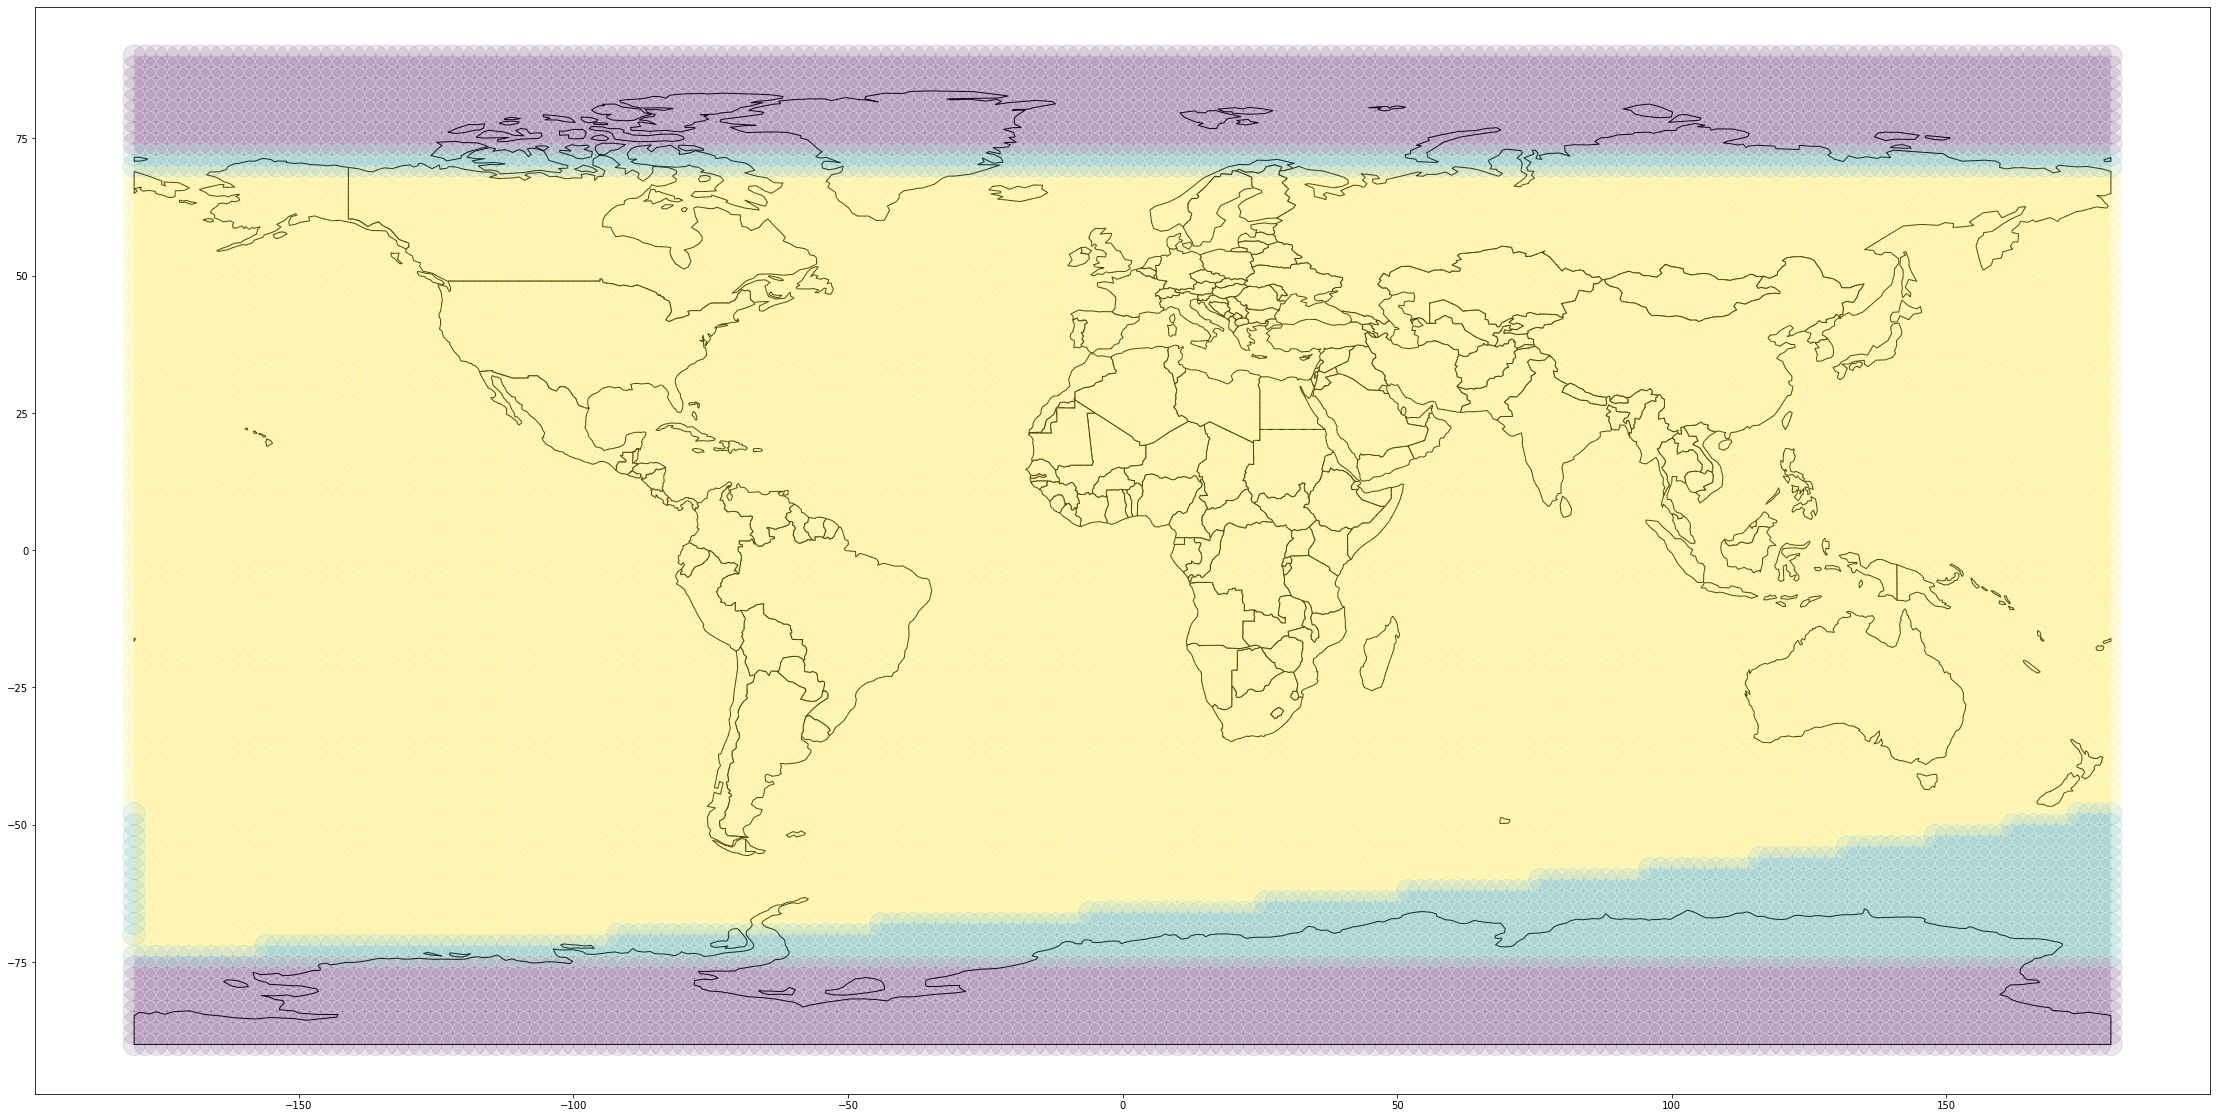

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


for df in grouped_dfs:
    df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
    
# Create a Geopandas GeoDataFrame from the list of DataFrames
gdf = gpd.GeoDataFrame(pd.concat(grouped_dfs), geometry='geometry')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(40, 20))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(column='Parameter', markersize=500, cmap='viridis', ax=ax,alpha=0.1)
plt.show()